In [1]:
from HeaderP import *
import Astraea
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import random
import time
from tqdm import trange
from stardate.lhf import gk_rotation_model
import stardate
from itertools import product



Holoviews not imported. Some visualizations will not be available.
PyMultiNest not imported.  MultiNest fits will not work.


In [5]:
path_to_age='./'
df_nob = pd.read_csv(path_to_age+'GyroKin_2022.csv')
#df_nob = pd.read_pickle(path_to_age+'new_age_ztf_santos.pkl')

def getiso(age, binsize=0.15):
    minage = age-binsize/2
    maxage = age+binsize/2
    df_agebin = df_nob.loc[(df_nob['kin_age']>minage)&(df_nob['kin_age']<maxage)]
    df_agebin = df_agebin.sort_values(by='teff_calc')
    teffsmooth, protsmooth = movingMed_time(df_agebin['teff_calc'],
                                            df_agebin['Prot'], 30, 300)
    m = (teffsmooth!=0)&(protsmooth!=0)
    return teffsmooth[m], protsmooth[m]

Text(0, 0.5, 'Prot [Days]')

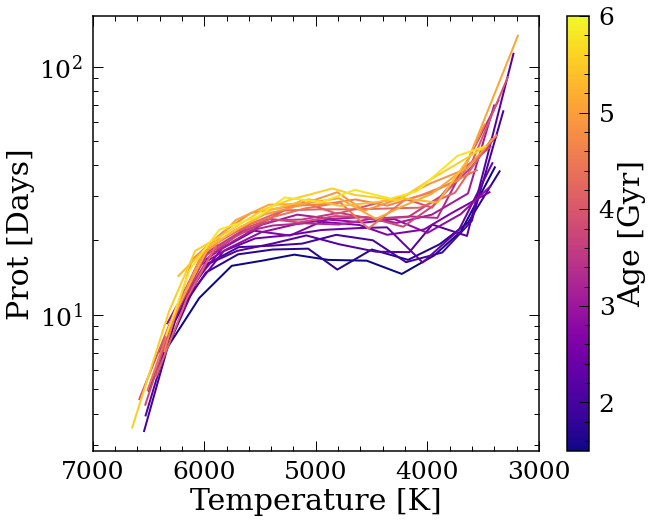

In [4]:

isoages = np.linspace(1.5,6,20)
colors = getcolor(range(len(isoages)+1), cm=plt.cm.get_cmap('plasma'))
plt.figure(figsize=(10,8))
for i in range(len(isoages)):
    teff, prot = getiso(isoages[i])
    plt.plot(teff, prot, color=colors[i])
plt.xlim([7000, 3000])
plt.yscale('log')

plt.scatter(1000,10, c=5, vmin=1.5,vmax=6, cmap='plasma')
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.xlabel('Temperature [K]')
plt.ylabel('Prot [Days]')

Text(0, 0.5, 'Prot [Days]')

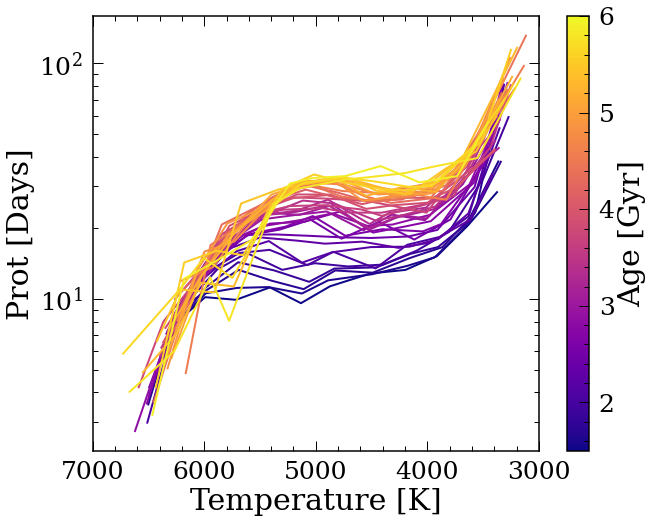

In [15]:

isoages = np.linspace(1.5,6,40)
colors = getcolor(range(len(isoages)+1), cm=plt.cm.get_cmap('plasma'))
plt.figure(figsize=(10,8))
for i in range(len(isoages)):
    teff, prot = getiso(isoages[i])
    plt.plot(teff, prot, color=colors[i])
plt.xlim([7000, 3000])
plt.yscale('log')

plt.scatter(1000,10, c=5, vmin=1.5,vmax=6, cmap='plasma')
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.xlabel('Temperature [K]')
plt.ylabel('Prot [Days]')